## Crosshatch Data Collection

Collects data for the crosshatch toy example to get an idea of the distribution of # of stitches

(6000, 2)
(6000,)
(6000, 2)


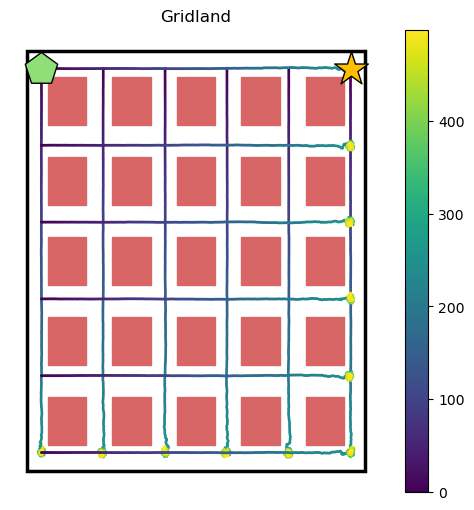

In [15]:
# COLLECTS FOR Start-4 random goal pairs only 

### collects for single S-G pair - from top left to bottom right. 
# randomly varies which direction to go at keypoints
from gridland_environment import GridLand
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt


# various parameters
MAX_EP_LENGTH = 500 # should take ~450 steps 
RANDOM_SEED = 42
SIZE = 5
step_size = 0.0075
keypoint_tolerance = 0.025 # for now set to same as env's goal tolerance who cares
gaussian_scale = 0.025 # random noise during action collection
save_directory = 'gridland_data_new'
generator = np.random.default_rng(seed=RANDOM_SEED)



# creates and resets the environment
env = GridLand(n_size=SIZE,timeout = MAX_EP_LENGTH,step_size=step_size)
state, info = env.reset(start_idx='T0',goal_idx='B' + str(SIZE))

# starts trajectory recording storage
obs_record = []
term_record = []
act_record = []

# defines start states we start from for each task
vertical_start = ['T0','T1','T2','T3','T4','T5']
horizontal_start = ['L0','L1','L2','L3','L4','L5']
truncated = False
for i,start_keypoint in enumerate(vertical_start):
    goal_idx = 'B' + start_keypoint[1]
    state, info = env.reset(start_idx=start_keypoint,goal_idx=goal_idx)
    while not truncated:
        obs_record.append(state)
        
        keypoint = env.convert_pos_str_to_coords(goal_idx)
        action = keypoint - state
        # adds small gaussian noise 
        action = action + generator.normal(loc=0,scale=gaussian_scale,size=action.shape)
        state, _, terminated, truncated, info = env.step(action)
        # recording
        term_record.append(truncated) # why this? sequence loader uses terminations as signs of traj. demarkation
        act_record.append(action)
    truncated = False
truncated = False
generator = np.random.default_rng(seed=RANDOM_SEED)
env = GridLand(n_size=SIZE,timeout = MAX_EP_LENGTH,step_size=step_size)
for i,start_keypoint in enumerate(horizontal_start):
    goal_idx = 'R' + start_keypoint[1]
    state, info = env.reset(start_idx=start_keypoint,goal_idx=goal_idx)
    while not truncated:
        obs_record.append(state)
        
        keypoint = env.convert_pos_str_to_coords(goal_idx)
        action = keypoint - state
        # adds small gaussian noise 
        action = action + generator.normal(loc=0,scale=gaussian_scale,size=action.shape)
        state, _, terminated, truncated, info = env.step(action)
        # recording
        term_record.append(truncated) # why this? sequence loader uses terminations as signs of traj. demarkation
        act_record.append(action)
    truncated = False

fig, ax = env.get_mpl_plot()
obs_record = np.array(obs_record)
term_record = np.array(term_record)
act_record = np.array(act_record)
print(obs_record.shape)
print(term_record.shape)
print(act_record.shape)
# shows a little bit of visualization
for episode in range(int(len(term_record)//MAX_EP_LENGTH)):
    thingy = ax.scatter(obs_record[episode*MAX_EP_LENGTH:(episode+1)*MAX_EP_LENGTH,0],
               obs_record[episode*MAX_EP_LENGTH:(episode+1)*MAX_EP_LENGTH,1],s=1,
               alpha=1,
               c=range(len(obs_record[episode*MAX_EP_LENGTH:(episode+1)*MAX_EP_LENGTH,0])))
fig.colorbar(thingy)
#ax.legend()
save_dict = {'observations':obs_record,'terminals':term_record,'actions':act_record}
np.save(save_directory+'/crosshatch'+'.npy',save_dict)